In [1]:
# Read data from external file 
import pandas as pd 
df = pd.read_csv("/Users/nuwai/Downloads/Reduced_Class_Train.csv")
df.head(2)

,age,gender,budget,noOfStays,timing,typeOfTravel,destination,activities,transport,planning,package,foodplace,attractions,accommodation,cancelPolicy
0,21,Female,2000,3,End of the year,Normal travel,Towns,Water activities,Personal Vehicle,Tour,Yes,Western/Steak house,Man-made Attractions,Hotels,Yes
1,21,Female,5000,4,Middle of the year,Backpacking,Islands,Water activities,Booking a flight,Self Explore,No,Seafood Restaurants,Natural Attractions,Resorts,Yes


In [2]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['gender','timing','typeOfTravel','destination','activities','transport','planning','package','foodplace','attractions','accommodation','cancelPolicy']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [4]:
# Data slicing
x = df.iloc[:, [0,1,2,3,8,10,11,12,13,14]]  #features
y = df.iloc[:, [6]]  #label

x.head(2)

,age,gender,budget,noOfStays,transport,package,foodplace,attractions,accommodation,cancelPolicy
0,21,0,2000,3,3,1,3,1,2,1
1,21,0,5000,4,0,0,2,2,3,1


In [5]:
# Convert dataframe to array 
x = x.values 
y = y.values 
y = y.ravel() 

In [6]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform', algorithm = 'auto', leaf_size = 100, p =1 , metric = 'minkowski', metric_params = None, n_jobs = None)

model.fit(x, y) 
yPred = model.predict(x) 

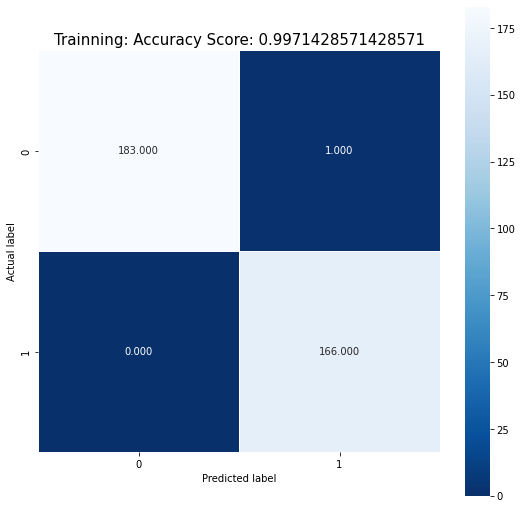

In [7]:
# Testing & performance analysis -Trainning data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Trainning: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred)) 
plt.title(all_sample_title, size = 15); 

In [8]:
# Read data from external file 
import pandas as pd 
df2 = pd.read_csv("/Users/nuwai/Downloads/Reduced_Class_Test.csv") 

In [9]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = [ 'gender','timing','typeOfTravel','destination','activities','transport','planning','package','foodplace','attractions','accommodation','cancelPolicy']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])

In [10]:
# Data slicing 
x2 = df2.iloc[:, [0,1,2,3,8,10,11,12,13,14]] 
y2 = df2.iloc[:, [6]] 

x2.head()

,age,gender,budget,noOfStays,transport,package,foodplace,attractions,accommodation,cancelPolicy
0,25,1,4500,7,0,1,0,1,2,1
1,18,1,1000,2,3,1,0,2,3,0
2,21,0,1000,5,0,1,2,1,3,1
3,18,1,2000,3,3,1,1,1,2,1
4,41,1,5000,3,3,0,2,1,2,1


In [11]:
# Convert dataframe to array 
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel() 

yPred2 = model.predict(x2) 

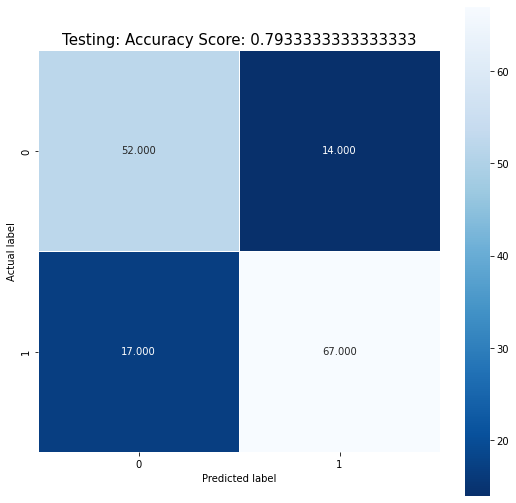

In [12]:
# Testing & performance analysis -Testing data 
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);